In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
data.shape

(5000, 14)

In [6]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Securities Account'}>,
        <Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>],
       [<Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, 

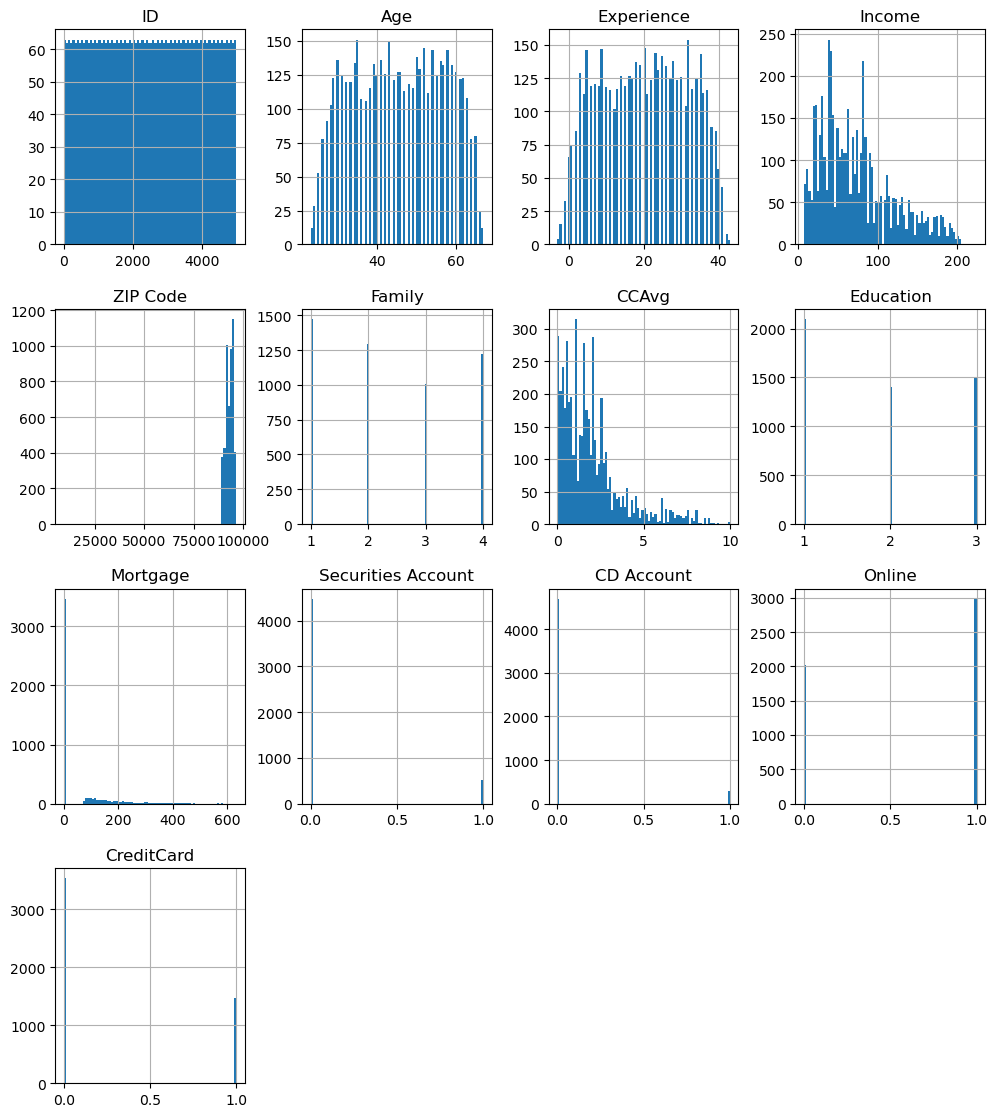

In [44]:
col = list(data.drop('Personal Loan', axis=1))
data[col].hist(bins=80, figsize=(12, 50), layout=(14, 4))


In [45]:
data.corr() #checkinh the correlation


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation of different attributes')

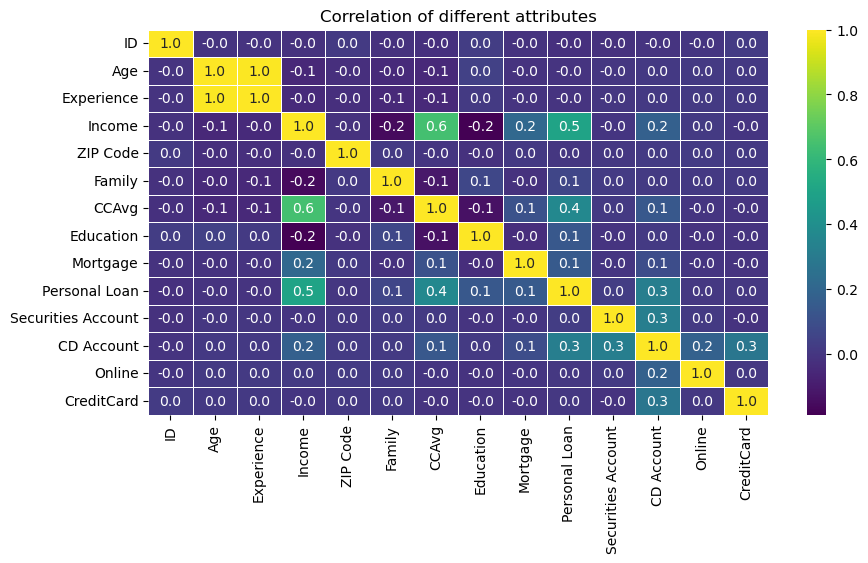

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title('Correlation of different attributes')

<IPython.core.display.Javascript object>

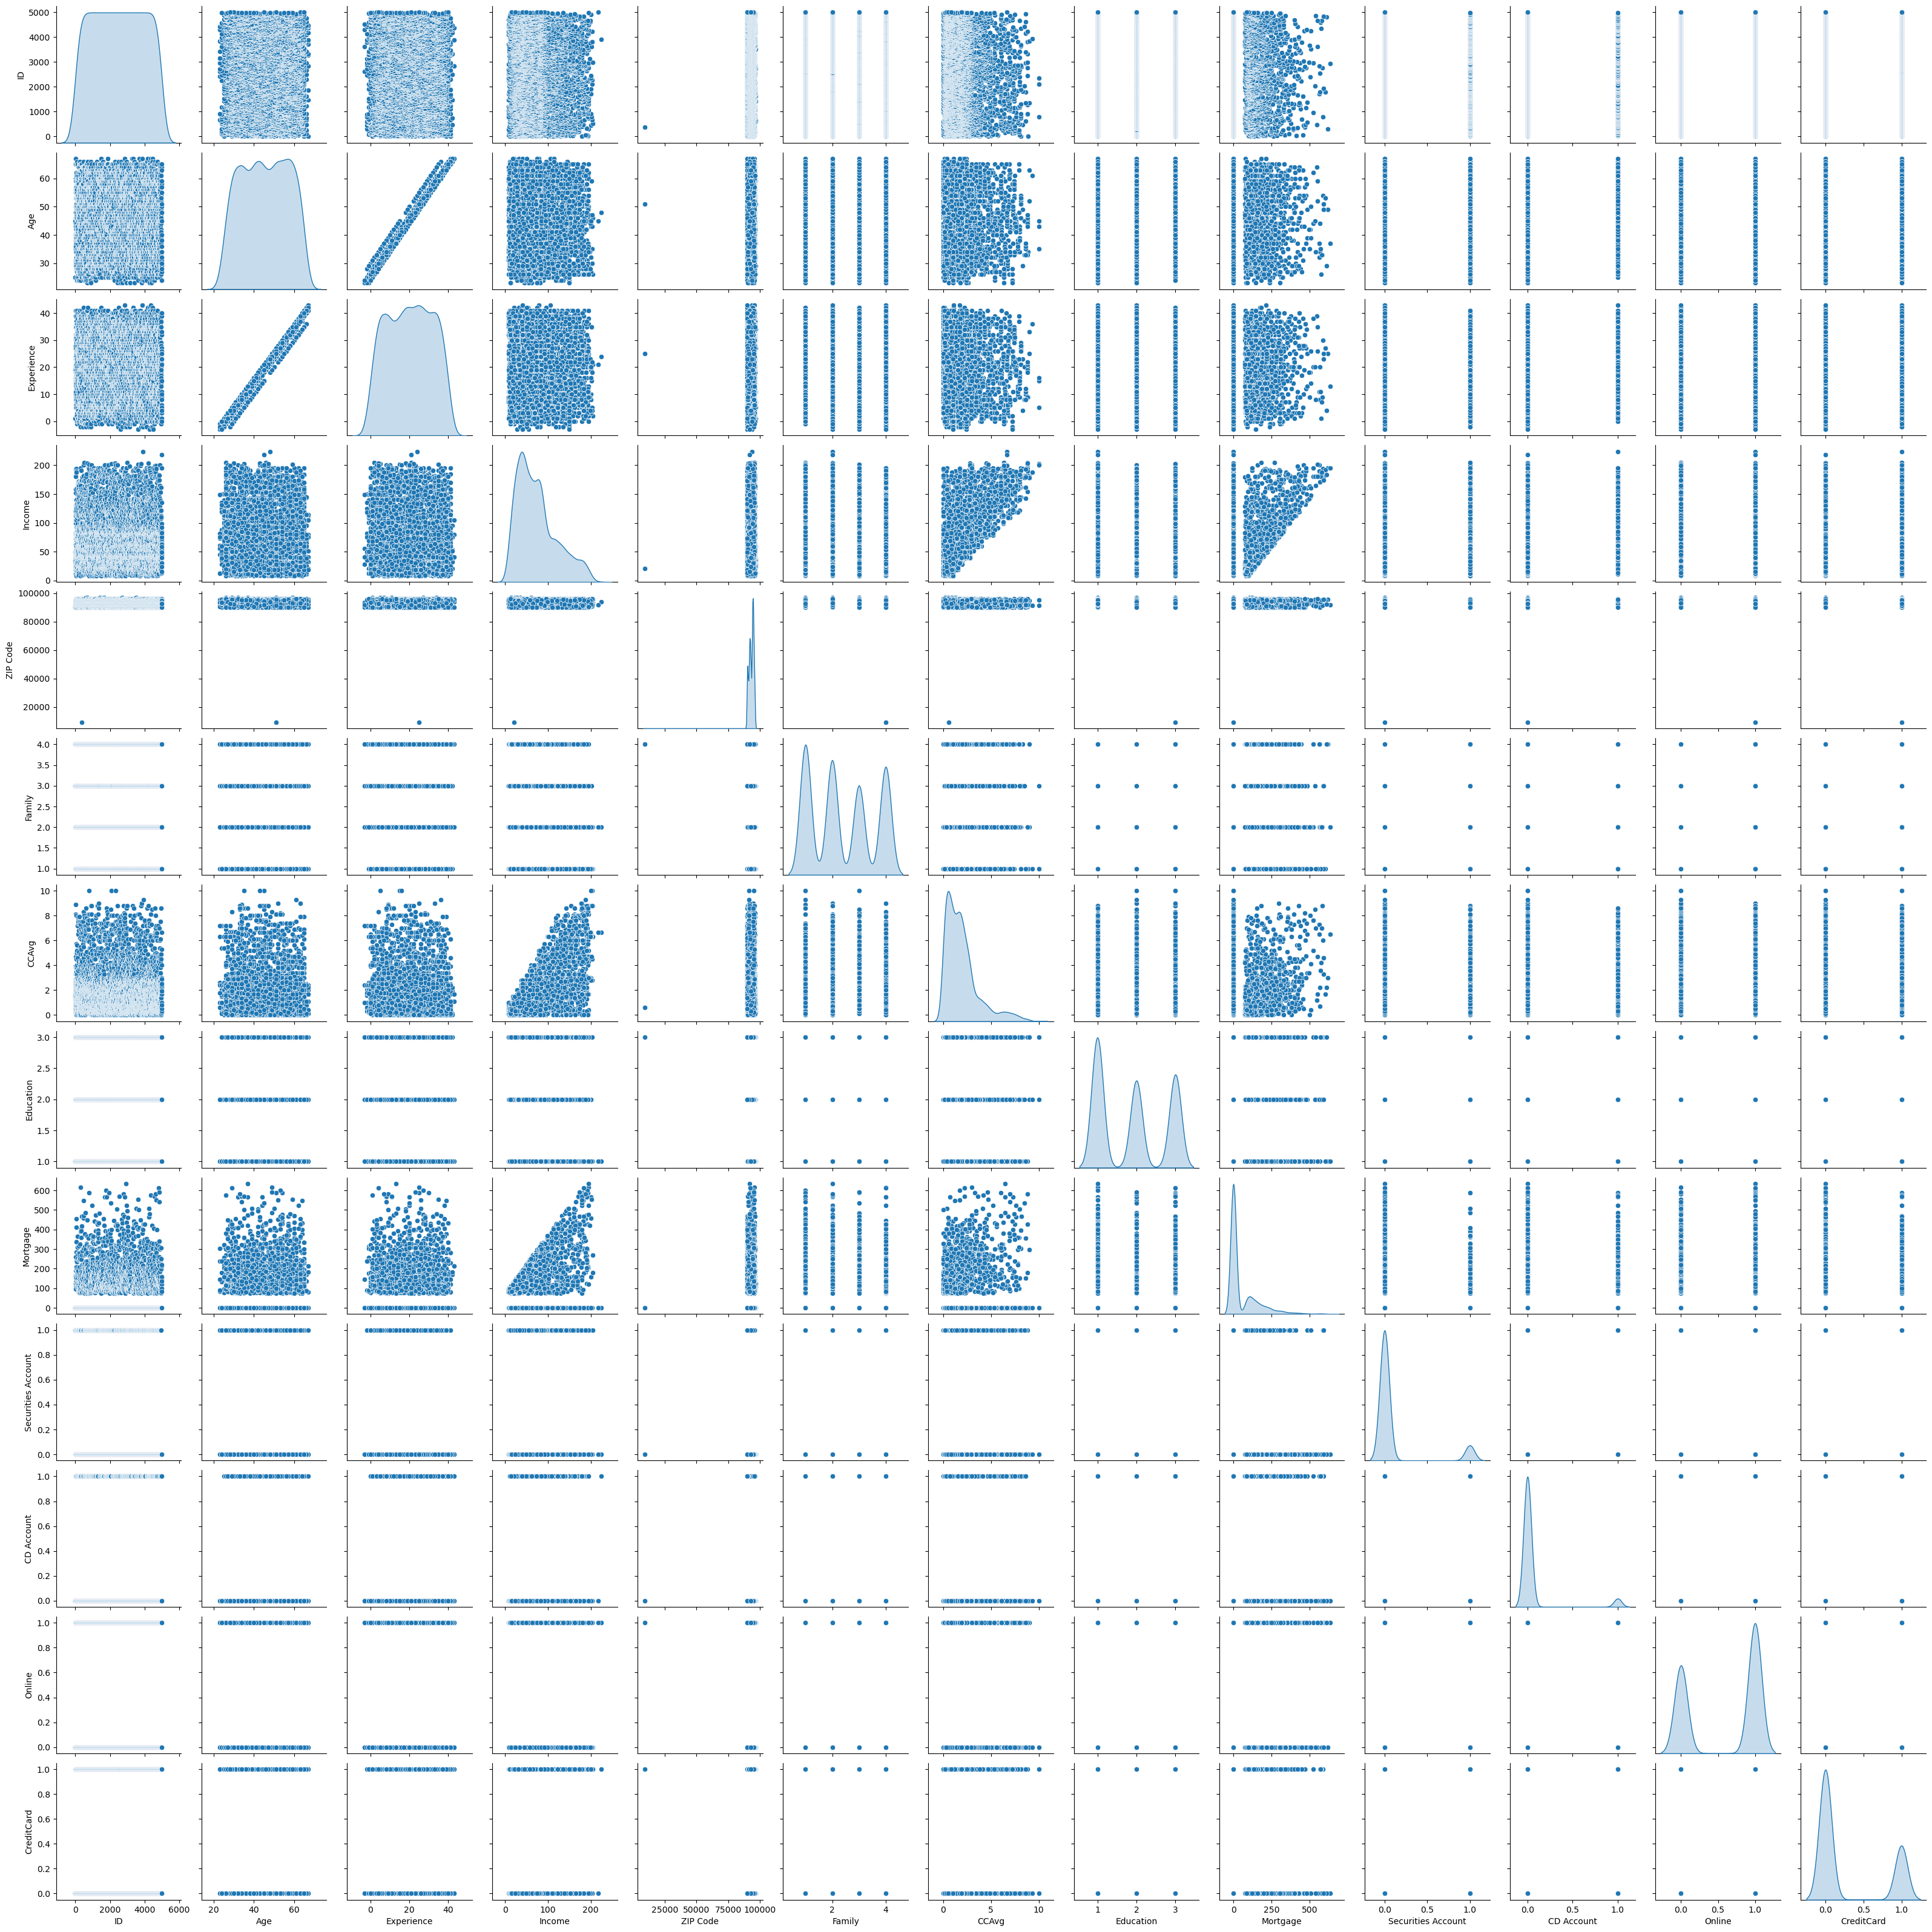

In [48]:
 data_new=data.drop('Personal Loan',axis=1)
sns.pairplot(data_new,diag_kind='kde')

In [58]:
x=data.drop('Personal Loan',axis=1)
y=data['Personal Loan']

In [59]:
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [60]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [79]:
x_train

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1335.0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,4769.0,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,66.0,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,178.0,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,4490.0,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2896.0,60.0,36.0,39.0,94501.0,4.0,1.3,2.0,140.000000,1.0,1.0,1.0,1.0
3496,2764.0,55.0,31.0,13.0,93943.0,4.0,0.7,1.0,181.659259,1.0,1.0,1.0,1.0
3497,906.0,46.0,22.0,28.0,94720.0,1.0,1.0,1.0,84.000000,1.0,1.0,1.0,1.0
3498,3981.0,46.0,22.0,89.0,92866.0,4.0,1.4,2.0,181.659259,1.0,1.0,1.0,1.0


In [80]:
y_test

2764    0
4767    0
3814    0
3499    0
2735    0
       ..
4140    0
3969    0
2535    0
1361    0
1458    0
Name: Personal Loan, Length: 1500, dtype: int64

In [81]:
#fill all the missing values with zero 
from sklearn.impute import SimpleImputer
replace=SimpleImputer(missing_values=0, strategy='mean')
cols=x_train.columns
x_train=pd.DataFrame(replace.fit_transform(x_train))
x_test=pd.DataFrame(replace.fit_transform(x_test))
x_train.columns=cols
x_test.columns=cols

In [82]:
x_train

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1335.0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,4769.0,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,66.0,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,178.0,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,4490.0,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2896.0,60.0,36.0,39.0,94501.0,4.0,1.3,2.0,140.000000,1.0,1.0,1.0,1.0
3496,2764.0,55.0,31.0,13.0,93943.0,4.0,0.7,1.0,181.659259,1.0,1.0,1.0,1.0
3497,906.0,46.0,22.0,28.0,94720.0,1.0,1.0,1.0,84.000000,1.0,1.0,1.0,1.0
3498,3981.0,46.0,22.0,89.0,92866.0,4.0,1.4,2.0,181.659259,1.0,1.0,1.0,1.0


In [83]:
x_test

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,2765.0,31.0,5.0,84.0,91320.0,1.0,2.90,3.0,105.000000,1.0,1.0,1.0,1.0
1,4768.0,35.0,9.0,45.0,90639.0,3.0,0.90,1.0,101.000000,1.0,1.0,1.0,1.0
2,3815.0,34.0,9.0,35.0,94304.0,3.0,1.30,1.0,188.432314,1.0,1.0,1.0,1.0
3,3500.0,49.0,23.0,114.0,94550.0,1.0,0.30,1.0,286.000000,1.0,1.0,1.0,1.0
4,2736.0,36.0,12.0,70.0,92131.0,3.0,2.60,2.0,165.000000,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4141.0,63.0,38.0,32.0,94015.0,1.0,1.50,2.0,188.432314,1.0,1.0,1.0,1.0
1496,3970.0,38.0,11.0,75.0,94305.0,3.0,2.33,2.0,188.432314,1.0,1.0,1.0,1.0
1497,2536.0,50.0,25.0,21.0,90274.0,2.0,0.70,3.0,129.000000,1.0,1.0,1.0,1.0
1498,1362.0,50.0,26.0,38.0,95039.0,4.0,0.90,2.0,188.432314,1.0,1.0,1.0,1.0


In [84]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [85]:
model.score(x_train,y_train)

0.9285714285714286

In [86]:
model.score(x_test,y_test)

0.9253333333333333

In [87]:
from sklearn import metrics
y_pred=model.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm1=pd.DataFrame(cm,index=[i for i in['No','Yes']],
                  columns=[i for i in ['Predicted No','Predicted Yes']])

In [88]:
df_cm1

,Predicted No,Predicted Yes
No,1321,30
Yes,82,67


<IPython.core.display.Javascript object>

<Axes: >

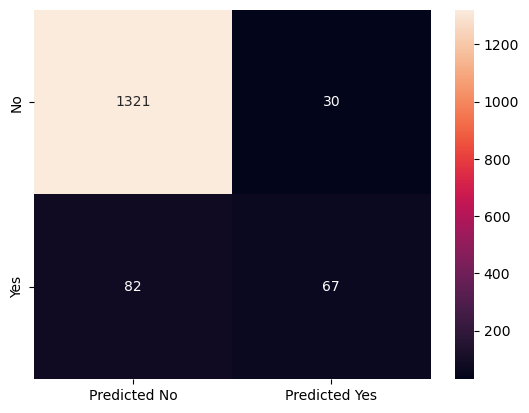

In [89]:
sns.heatmap(df_cm1,annot=True,fmt='g')

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.93
Precision: 0.69
Recall: 0.45
F1 Score: 0.54

Confusion Matrix:
[[1321   30]
 [  82   67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.69      0.45      0.54       149

    accuracy                           0.93      1500
   macro avg       0.82      0.71      0.75      1500
weighted avg       0.92      0.93      0.92      1500



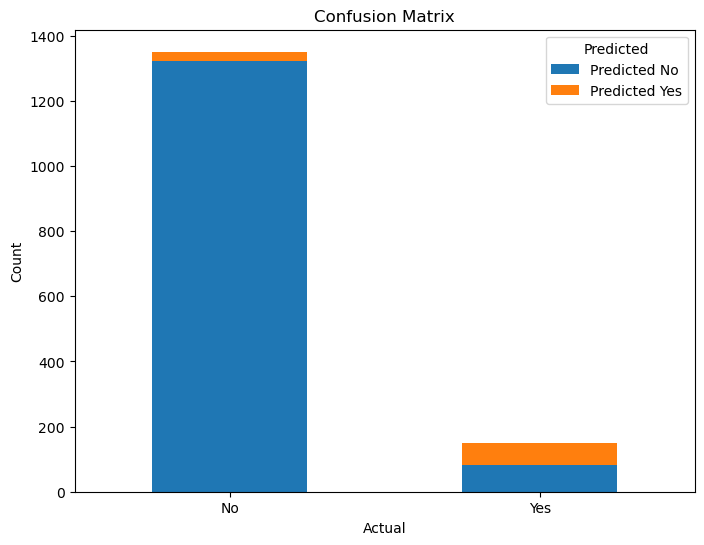

In [91]:
df_cm1.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Predicted', bbox_to_anchor=(1, 1))
plt.show()

In [92]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [93]:
model.score(x_train,y_train)

0.9051428571428571

In [94]:
model.score(x_test,y_test)

0.8866666666666667

In [95]:
from sklearn import metrics
y_predict=model.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm2=pd.DataFrame(cm,index=[i for i in['No','Yes']],
                  columns=[i for i in ['Predicted No','Predicted Yes']])

In [96]:
df_cm2

,Predicted No,Predicted Yes
No,1254,97
Yes,73,76


<IPython.core.display.Javascript object>

<Axes: >

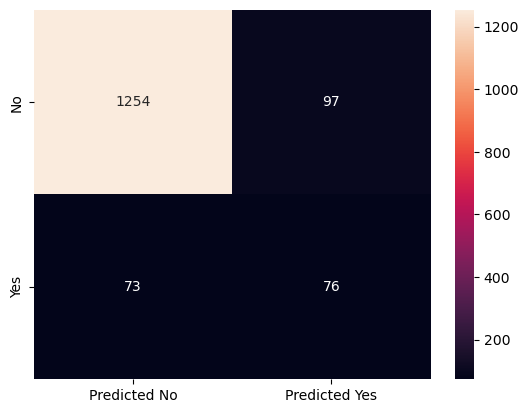

In [97]:
sns.heatmap(df_cm2,annot=True,fmt='g')

In [98]:
fig = px.bar(df_cm2, barmode='stack', color_discrete_map={'Predicted No': 'red', 'Predicted Yes': 'black'})

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Count'),
    xaxis_categoryorder='array',
    xaxis_categoryarray=['No', 'Yes'],
    legend=dict(title='Predicted'),
    hovermode='x',
    height=500,
    width=700
)

fig.show()

<IPython.core.display.Javascript object>

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)

# Display the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.89
Precision: 0.44
Recall: 0.51
F1 Score: 0.47

Confusion Matrix:
[[1254   97]
 [  73   76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1351
           1       0.44      0.51      0.47       149

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.89      0.89      0.89      1500



In [100]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
model.score(x_train,y_train)

0.9134285714285715

In [102]:
model.score(x_test,y_test)

0.9026666666666666

In [103]:
from sklearn import metrics
y_predic=model.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_predic,labels=[0,1])
df_cm3=pd.DataFrame(cm,index=[i for i in['No','Yes']],
                  columns=[i for i in ['Predicted No','Predicted Yes']])

In [104]:
df_cm3

,Predicted No,Predicted Yes
No,1349,2
Yes,144,5


<IPython.core.display.Javascript object>

<Axes: >

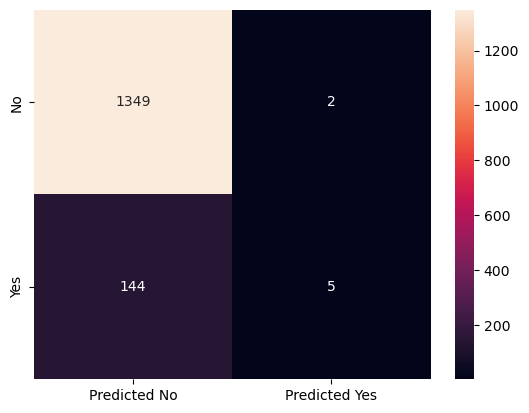

In [105]:
sns.heatmap(df_cm3,annot=True,fmt='g')

In [106]:
fig = px.bar(df_cm3, barmode='stack', color_discrete_map={'Predicted No': '#1f77b4', 'Predicted Yes': '#ff7f0e'})

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Actual'),
    yaxis=dict(title='Count'),
    xaxis_categoryorder='array',
    xaxis_categoryarray=['No', 'Yes'],
    legend=dict(title='Predicted'),
    hovermode='x',
    height=500,
    width=700
)

fig.show()

<IPython.core.display.Javascript object>

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_predic)
precision = precision_score(y_test, y_predic)
recall = recall_score(y_test, y_predic)
f1 = f1_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predic)
classification_rep = classification_report(y_test, y_predic)

# Display the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.90
Precision: 0.71
Recall: 0.03
F1 Score: 0.47

Confusion Matrix:
[[1349    2]
 [ 144    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.71      0.03      0.06       149

    accuracy                           0.90      1500
   macro avg       0.81      0.52      0.51      1500
weighted avg       0.88      0.90      0.86      1500



In [108]:
#KNeighborClassification Algorithm is best in these three algorithms